<p style="font-family: Arial; font-size:3.75em;color:purple; font-style:bold">
<br>FANAL KRYPTON ANALYSIS</p><br>

In [1]:
from IPython.core.display import HTML
css = open('css/style-table.css').read() + open('css/style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
%matplotlib inline

In [4]:
%load_ext memory_profiler
%load_ext line_profiler

import line_profiler
profile = line_profiler.LineProfiler()

In [5]:
# General importings
import glob
import json

import matplotlib.pyplot        as plt

# Specific IC stuff
import invisible_cities.core.system_of_units  as units

# Specific FANAL stuff
from fanal.fanal_setup       import Setup
from fanal.core.fanal_types  import KrAnalysisParams

# Krypton analysis params

In [6]:
kr_ifname = "/Users/Javi/Development/nexus-production/data/FLEX100F_M6_O6.EL8bar/kr83.ACTIVE.full/dst/*.h5"
det_name  = "FLEX100F"
verbosity = "WARNING"

In [7]:
kr_analysis_params = KrAnalysisParams(veto_width          = 20. * units.mm,
                                      tracking_sns_pde    = 1.0,
                                      tracking_mask_att   = 0.0,
                                      tracking_charge_th  = 0.0,
                                      correction_map_type = 'rad'
                                     )

# ANALYSIS functions

In [8]:
import pandas as pd
import numpy  as np

from typing import Tuple

from invisible_cities.core.core_functions     import in_range

from fanal.core.detectors      import Detector
from fanal.core.detectors      import S1_WIDTH
from fanal.core.sensors        import get_sensor_response
from fanal.core.sensors        import get_energy_response
from fanal.core.sensors        import get_tracking_response
from fanal.containers.kryptons import Krypton
from fanal.utils.types         import XYZ

In [9]:
from fanal.analysis.kr_analysis import analyze_kr_event

# Krypton analysis

In [10]:
from invisible_cities.io.mcinfo_io  import load_mcsensor_response_df
from invisible_cities.io.mcinfo_io  import load_mchits_df

from fanal.containers.kryptons      import KryptonList
from fanal.utils.mc_utils           import get_event_numbers_in_file
from fanal.utils.logger             import get_logger
from fanal.core.detectors           import get_detector

In [11]:
kr_fnames = sorted(glob.glob(kr_ifname))#[0:5]
detector  = get_detector(det_name)
logger    = get_logger('Fanal', verbosity)

In [12]:
detector
#detector.get_sensor_types()

* Detector name: FLEX100F
  ACTIVE dimensions (mm): Zmin = 0.00   Zmax = 1204.95   Rad = 492.00
  Symmetric: False
  Energy   Sensors  : ['F_SENSOR_L', 'F_SENSOR_R']
  Tracking Sensors  : ['TP_SiPM']
  Tracking map fname: FLEX100F.tracking_map.csv

In [13]:
kr_analysis_params

*** Veto width:            20.0 mm
*** Tracking sensors pde:  1.000
*** Tracking mask att:     0.000
*** Tracking charge th:    0.000 pes
*** Correction map type:   rad

In [14]:
all_kryptons = KryptonList()

In [15]:
for ifname in kr_fnames:
    event_ids = get_event_numbers_in_file(ifname)
    print(f'\n*** Processing {ifname}  ({len(event_ids)} events) ...\n')
    
    sns_response = load_mcsensor_response_df(ifname)
    mcHits       = load_mchits_df(ifname)
    
    # Looping through all the events in iFile
    for event_id in event_ids:
        logger.info(f"Analyzing Kr event {event_id}")
        krypton_data = analyze_kr_event(detector,
                                        kr_analysis_params,
                                        event_id,
                                        sns_response.loc[event_id, :],
                                        mcHits      .loc[event_id, :])
        all_kryptons.add(krypton_data)



*** Processing /Users/Javi/Development/nexus-production/data/FLEX100F_M6_O6.EL8bar/kr83.ACTIVE.full/dst/FLEX100F_M6_O6.Kr83.ACTIVE.0.next.h5  (100 events) ...


*** Processing /Users/Javi/Development/nexus-production/data/FLEX100F_M6_O6.EL8bar/kr83.ACTIVE.full/dst/FLEX100F_M6_O6.Kr83.ACTIVE.1.next.h5  (100 events) ...


*** Processing /Users/Javi/Development/nexus-production/data/FLEX100F_M6_O6.EL8bar/kr83.ACTIVE.full/dst/FLEX100F_M6_O6.Kr83.ACTIVE.10.next.h5  (100 events) ...


*** Processing /Users/Javi/Development/nexus-production/data/FLEX100F_M6_O6.EL8bar/kr83.ACTIVE.full/dst/FLEX100F_M6_O6.Kr83.ACTIVE.11.next.h5  (100 events) ...


*** Processing /Users/Javi/Development/nexus-production/data/FLEX100F_M6_O6.EL8bar/kr83.ACTIVE.full/dst/FLEX100F_M6_O6.Kr83.ACTIVE.12.next.h5  (100 events) ...


*** Processing /Users/Javi/Development/nexus-production/data/FLEX100F_M6_O6.EL8bar/kr83.ACTIVE.full/dst/FLEX100F_M6_O6.Kr83.ACTIVE.13.next.h5  (100 events) ...


*** Processing /Users/Javi/De


*** Processing /Users/Javi/Development/nexus-production/data/FLEX100F_M6_O6.EL8bar/kr83.ACTIVE.full/dst/FLEX100F_M6_O6.Kr83.ACTIVE.55.next.h5  (100 events) ...


*** Processing /Users/Javi/Development/nexus-production/data/FLEX100F_M6_O6.EL8bar/kr83.ACTIVE.full/dst/FLEX100F_M6_O6.Kr83.ACTIVE.56.next.h5  (100 events) ...


*** Processing /Users/Javi/Development/nexus-production/data/FLEX100F_M6_O6.EL8bar/kr83.ACTIVE.full/dst/FLEX100F_M6_O6.Kr83.ACTIVE.57.next.h5  (100 events) ...


*** Processing /Users/Javi/Development/nexus-production/data/FLEX100F_M6_O6.EL8bar/kr83.ACTIVE.full/dst/FLEX100F_M6_O6.Kr83.ACTIVE.58.next.h5  (100 events) ...


*** Processing /Users/Javi/Development/nexus-production/data/FLEX100F_M6_O6.EL8bar/kr83.ACTIVE.full/dst/FLEX100F_M6_O6.Kr83.ACTIVE.59.next.h5  (100 events) ...


*** Processing /Users/Javi/Development/nexus-production/data/FLEX100F_M6_O6.EL8bar/kr83.ACTIVE.full/dst/FLEX100F_M6_O6.Kr83.ACTIVE.6.next.h5  (100 events) ...


*** Processing /Users/Javi/D

In [16]:
all_kryptons_df = all_kryptons.df()

In [17]:
all_kryptons_df.head()

,x_true,y_true,z_true,rad_true,energy_true,x_rec,y_rec,z_rec,rad_rec,energy_rec,s1_pes,s2_pes,s1_pes_corr,s2_pes_corr,q_tot,q_max
krypton_id,,,,,,,,,,,,,,,,
0,40.910732,269.406006,1145.470947,272.494558,0.041543,43.640323,267.094118,1138.216,270.635817,0.0,71,73787,0,0,1112,84
1,37.236282,-112.786751,429.997040,118.774542,0.041543,37.123320,-112.720222,425.301,118.675985,0.0,72,72206,0,0,1120,129
2,-170.029358,163.259277,388.660980,235.719270,0.041543,-170.903302,164.599630,383.041,237.278268,0.0,82,73890,0,0,1137,130
3,-191.342270,103.124878,865.295593,217.362841,0.041543,-189.175159,99.219602,858.643,213.615941,0.0,78,72958,0,0,1073,81
4,-45.041477,-142.213043,886.746155,149.175348,0.041543,-46.002083,-141.921127,880.017,149.190475,0.0,63,72304,0,0,1096,100


In [18]:
from fanal.core.correction_maps import build_correction_map
from fanal.core.correction_maps import correct_s2

In [19]:
fiduc_selection = ((all_kryptons_df.z_rec   >= detector.active_z_min + kr_analysis_params.veto_width) &
                   (all_kryptons_df.z_rec   <= detector.active_z_max - kr_analysis_params.veto_width) &
                   (all_kryptons_df.rad_rec <= detector.active_rad   - kr_analysis_params.veto_width))

In [20]:
fiduc_kryptons = all_kryptons_df[fiduc_selection].copy()

In [21]:
fiduc_kryptons.head()

,x_true,y_true,z_true,rad_true,energy_true,x_rec,y_rec,z_rec,rad_rec,energy_rec,s1_pes,s2_pes,s1_pes_corr,s2_pes_corr,q_tot,q_max
krypton_id,,,,,,,,,,,,,,,,
0,40.910732,269.406006,1145.470947,272.494558,0.041543,43.640323,267.094118,1138.216,270.635817,0.0,71,73787,0,0,1112,84
1,37.236282,-112.786751,429.997040,118.774542,0.041543,37.123320,-112.720222,425.301,118.675985,0.0,72,72206,0,0,1120,129
2,-170.029358,163.259277,388.660980,235.719270,0.041543,-170.903302,164.599630,383.041,237.278268,0.0,82,73890,0,0,1137,130
3,-191.342270,103.124878,865.295593,217.362841,0.041543,-189.175159,99.219602,858.643,213.615941,0.0,78,72958,0,0,1073,81
4,-45.041477,-142.213043,886.746155,149.175348,0.041543,-46.002083,-141.921127,880.017,149.190475,0.0,63,72304,0,0,1096,100


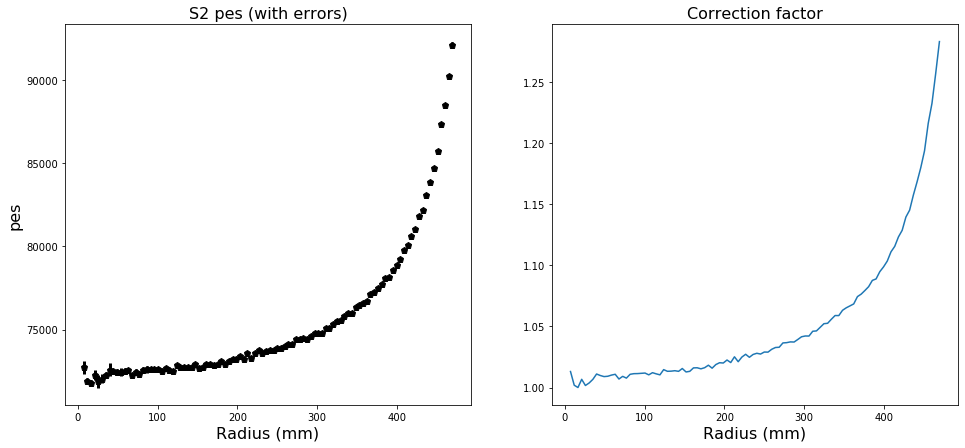

In [22]:
corr_map = build_correction_map(fiduc_kryptons, kr_analysis_params.correction_map_type, num_bins=100)

In [23]:
pes_corr = correct_s2(fiduc_kryptons, corr_map, kr_analysis_params.correction_map_type)

In [63]:
pes_to_MeV = (kr_energy/units.MeV) / fiduc_kryptons.s2_pes_corr.mean()

In [67]:
fiduc_kryptons.energy_rec = fiduc_kryptons.s2_pes_corr * pes_to_MeV

# Analysis results

In [68]:
from fanal.core.fanal_units import Qbb
from fanal.core.fanal_units import kr_energy

from fanal.utils.plot_utils import plot_vertices
from fanal.utils.plot_utils import plot_and_fit

In [69]:
plt.rcParams["figure.figsize"] = 8, 6
plt.rcParams["font.size"     ] = 14

#### Vertices

In [70]:
#plot_vertices(all_kryptons_df.rename(columns = {'x_true': 'x', 'y_true': 'y', 'z_true': 'z'}),
#              num_bins=40, extra_size = 50)

#### Positions

In [71]:
dist_x  = fiduc_kryptons.x_true - fiduc_kryptons.x_rec
dist_y  = fiduc_kryptons.y_true - fiduc_kryptons.y_rec

dist_xy = XYZ(fiduc_kryptons.x_true, fiduc_kryptons.y_true, 0.).distance( \
          XYZ(fiduc_kryptons.x_rec , fiduc_kryptons.y_rec , 0.))

Distance X description:
count    8900.000000
mean        0.015113
std         2.619110
min       -16.330676
25%        -1.091235
50%         0.009799
75%         1.098113
max        14.191901
dtype: float64
Distance Y description:
count    8900.000000
mean       -0.012921
std         2.588426
min       -13.938517
25%        -1.098509
50%        -0.011027
75%         1.083609
max        16.298171
dtype: float64


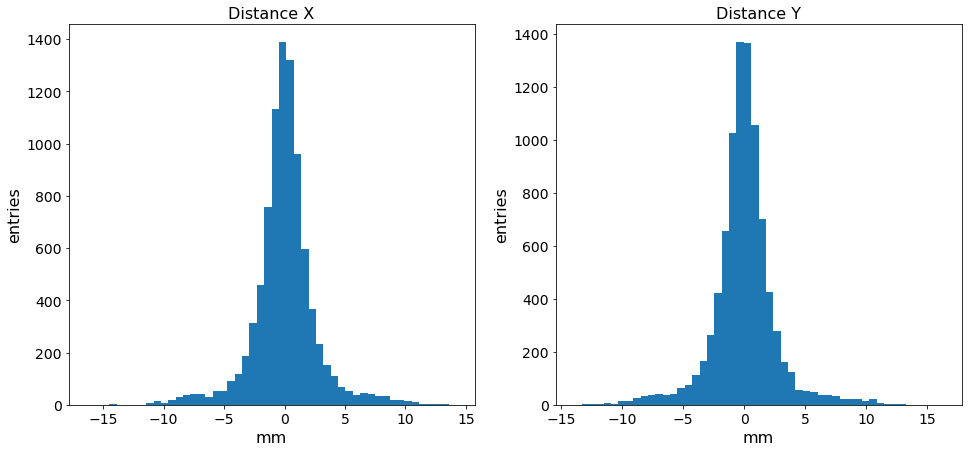

In [72]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,7))
ax1.hist(dist_x, 50);
ax1.set_title ("Distance X", size=16);
ax1.set_xlabel("mm", size=16);
ax1.set_ylabel("entries", size=16);

energy_sns_pde = 0.4
ax2.hist(dist_y, 50);
ax2.set_title (f"Distance Y", size=16);
ax2.set_xlabel("mm", size=16);
ax2.set_ylabel("entries", size=16);

print("Distance X description:")
print(dist_x.describe())
print("Distance Y description:")
print(dist_y.describe())


Distance XY description:


count    8900.000000
mean        2.795720
std         2.396487
min         0.011275
25%         1.127111
50%         2.040284
75%         3.590485
max        16.400604
dtype: float64

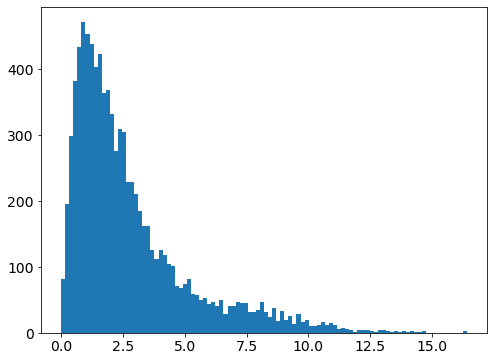

In [73]:
plt.hist(dist_xy, bins = 100);
print("Distance XY description:")
dist_xy.describe()

#### Energy - S1

In [74]:
fiduc_kryptons.s1_pes.describe()

count    8900.000000
mean       72.238539
std        10.558271
min        36.000000
25%        65.000000
50%        72.000000
75%        79.000000
max       111.000000
Name: s1_pes, dtype: float64

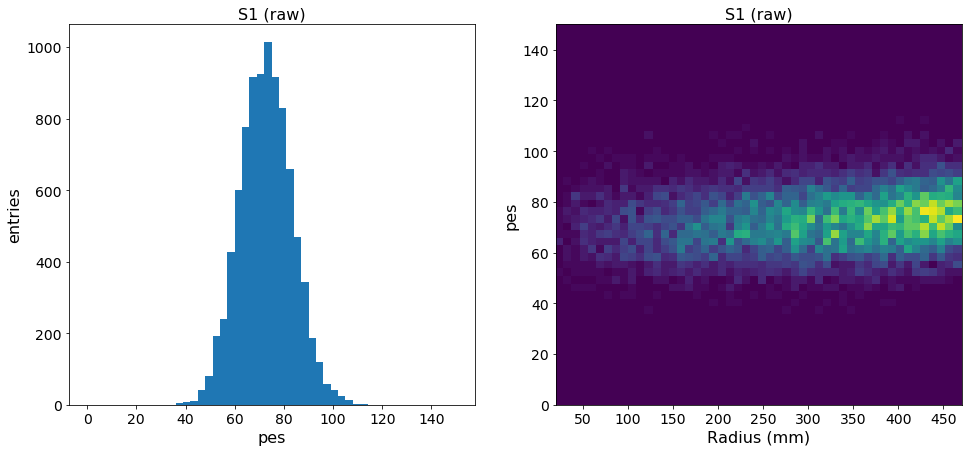

In [75]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,7))
ax1.hist(fiduc_kryptons.s1_pes, 50, range=[0, 150]);
ax1.set_title ("S1 (raw)", size=16);
ax1.set_xlabel("pes"     , size=16);
ax1.set_ylabel("entries" , size=16);

ax2.hist2d(fiduc_kryptons.rad_true, fiduc_kryptons.s1_pes, (50, 50), range=[[20, 470], [0, 150]]);
ax2.set_title ("S1 (raw)"   , size=16);
ax2.set_xlabel("Radius (mm)", size=16);
ax2.set_ylabel("pes"        , size=16);

#### Light Collection Efficiency

In [76]:
# The number of initial scintillation photons for kr is 
# the kr energy / Wsci del xenon
xe_Wsci = 39.2 * units.eV
num_kr_s1_photons = kr_energy / xe_Wsci

# This collection efficiency has been computed asuming that the sesnors used to read it:
# Have a pde = 100 %
# Don't have background
fiduc_kryptons['col_eff'] = fiduc_kryptons.s1_pes / num_kr_s1_photons / units.perCent

count    8900.000000
mean        2.726573
std         0.398512
min         1.358785
25%         2.453362
50%         2.717570
75%         2.981778
max         4.189587
Name: col_eff, dtype: float64

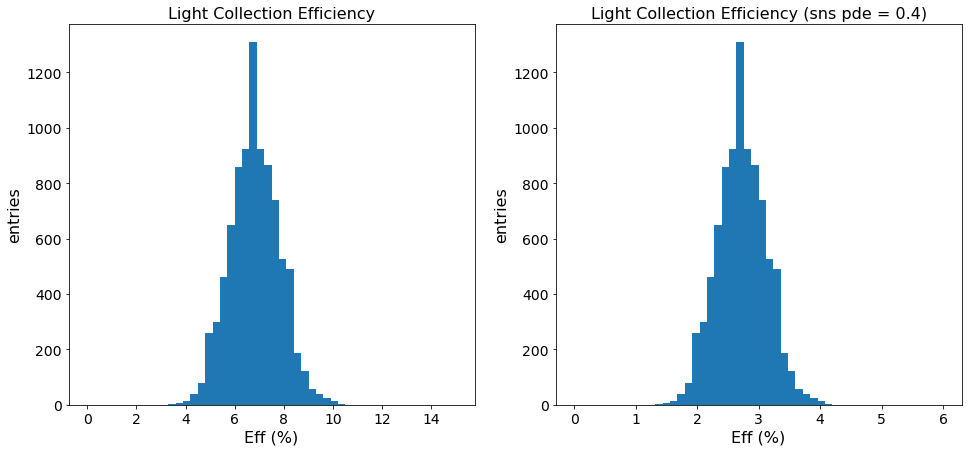

In [77]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,7))
ax1.hist(fiduc_kryptons.col_eff, 50, range=(0, 15));
ax1.set_title ("Light Collection Efficiency", size=16);
ax1.set_xlabel("Eff (%)", size=16);
ax1.set_ylabel("entries", size=16);

energy_sns_pde = 0.4
ax2.hist(fiduc_kryptons.col_eff * energy_sns_pde, 50, range=(0, 6));
ax2.set_title (f"Light Collection Efficiency (sns pde = {energy_sns_pde})", size=16);
ax2.set_xlabel("Eff (%)", size=16);
ax2.set_ylabel("entries", size=16);

(fiduc_kryptons.col_eff * energy_sns_pde).describe()

#### Energy - S2

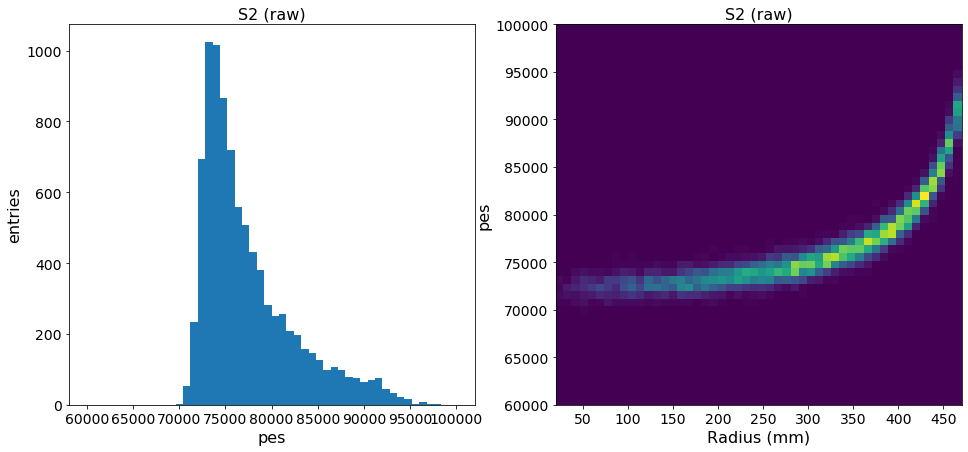

In [78]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,7))
ax1.hist(fiduc_kryptons.s2_pes, 50, (60000, 100000))
ax1.set_title ("S2 (raw)"   , size=16);
ax1.set_xlabel("pes"     , size=16);
ax1.set_ylabel("entries" , size=16);

ax2.hist2d(fiduc_kryptons.rad_true, fiduc_kryptons.s2_pes, (50, 50), range=[[20, 470], [60000, 100000]])
ax2.set_title ("S2 (raw)"   , size=16);
ax2.set_xlabel("Radius (mm)", size=16);
ax2.set_ylabel("pes"        , size=16);

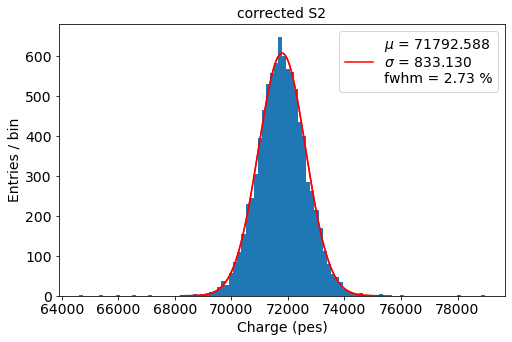

DATA from corrected S2 ...
mu    =  71792.588 +- 8.871
sigma =    833.130 +- 6.465  ->  fwhm  = 2.727 %
Chi2  =      1.114

fwhm at Qbb: 0.355 %


In [79]:
mu, sigma, fwhm = plot_and_fit(fiduc_kryptons.s2_pes_corr, title="corrected S2", num_bins=100);

print(f"fwhm at Qbb: {fwhm * (kr_energy / Qbb)**.5 / units.perCent:.3} %")

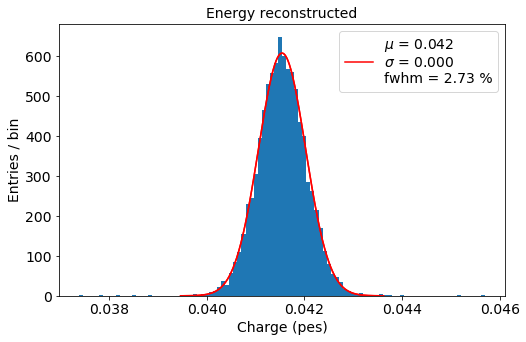

DATA from Energy reconstructed ...
mu    =      0.042 +- 0.000
sigma =      0.000 +- 0.000  ->  fwhm  = 2.727 %
Chi2  =      1.114

fwhm at Qbb: 0.355 %


In [80]:
mu, sigma, fwhm = plot_and_fit(fiduc_kryptons.energy_rec, title="Energy reconstructed", num_bins=100);

print(f"fwhm at Qbb: {fwhm * (kr_energy / Qbb)**.5 / units.perCent:.3} %")

#### Charge

In [36]:
print(f"REMEMBER ... Current detector:\n {detector}\n")

REMEMBER ... Current detector:
 * Detector name: FLEX100F
  ACTIVE dimensions (mm): Zmin = 0.00   Zmax = 1204.95   Rad = 492.00
  Symmetric: False
  Energy   Sensors  : ['F_SENSOR_L', 'F_SENSOR_R']
  Tracking Sensors  : ['TP_SiPM']
  Tracking map fname: FLEX100F.tracking_map.csv




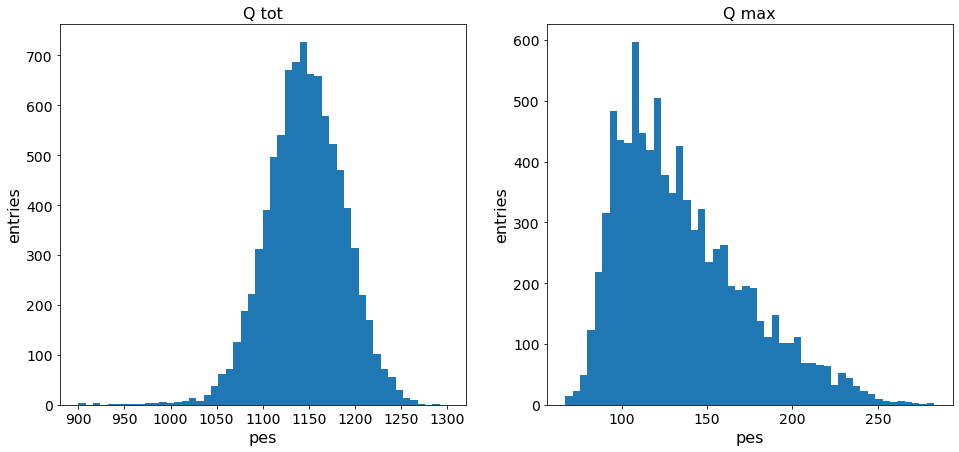

In [86]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,7))
ax1.hist(fiduc_kryptons.q_tot, 50)
#ax1.hist(fiduc_kryptons.q_tot, 50, range=[900, 1300])
ax1.set_title ("Q tot"   , size=16);
ax1.set_xlabel("pes"     , size=16);
ax1.set_ylabel("entries" , size=16);

ax2.hist(fiduc_kryptons.q_max, 50)
ax2.set_title ("Q max"   , size=16);
ax2.set_xlabel("pes"     , size=16);
ax2.set_ylabel("entries" , size=16);

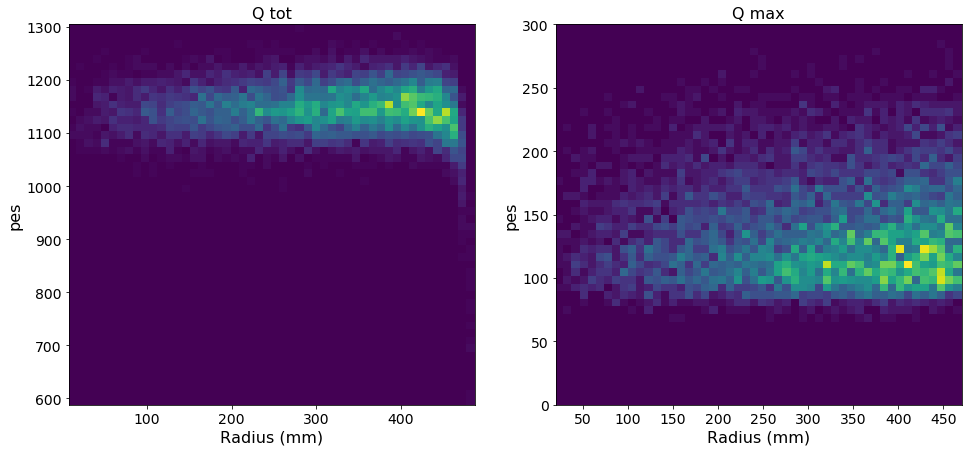

In [91]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,7))
ax1.hist2d(fiduc_kryptons.rad_true, fiduc_kryptons.q_tot, (50, 50))
#ax1.hist2d(fiduc_kryptons.rad_true, fiduc_kryptons.q_tot, (50, 50), range=[[20, 470], [900, 1300]])
ax1.set_title ("Q tot"      , size=16);
ax1.set_xlabel("Radius (mm)", size=16);
ax1.set_ylabel("pes"        , size=16);

#ax2.hist2d(fiduc_kryptons.rad_true, fiduc_kryptons.q_max, (50, 50))
ax2.hist2d(fiduc_kryptons.rad_true, fiduc_kryptons.q_max, (50, 50), range=[[20, 470], [0, 300]])
ax2.set_title ("Q max"      , size=16);
ax2.set_xlabel("Radius (mm)", size=16);
ax2.set_ylabel("pes"        , size=16);